In [1]:
import numpy as np
from Bio import PDB
import itertools

In [2]:
parser = PDB.PDBParser()
pdb1 ='./movie/16tauC10-39-snap.pdb' 
structure = parser.get_structure("tauC10", pdb1)

c:\Apps\Anaconda\lib\site-packages\Bio\PDB\PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1505
  warnings.warn(


In [3]:
all_atoms = [A for A in structure.get_atoms()]

In [6]:
all_atoms[0].get_coord()

array([ 85.062, 132.787,  25.422], dtype=float32)

In [13]:
distances = []
for each in itertools.combinations(all_atoms, 2):
    one  = each[0].get_coord()
    two = each[1].get_coord()
    distances.append(np.linalg.norm(one-two))
distances = np.array(distances)/10

In [15]:
print(distances.min(),distances.max())

0.09799837 10.117657


In [16]:
hist,dis_edge = np.histogram(distances,range=[0,10.2],bins=102)

In [17]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Space distance (nm)')

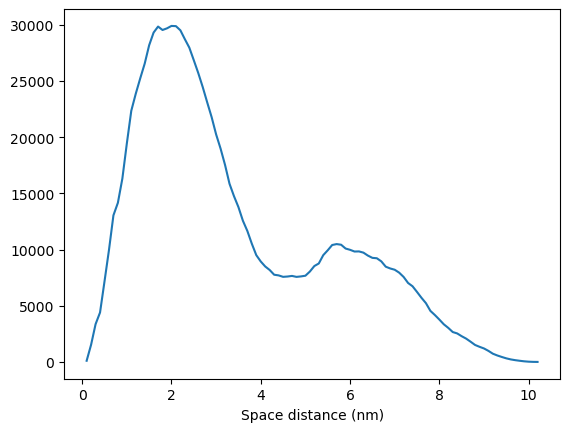

In [23]:
plt.plot(dis_edge[1:],hist)
plt.xlabel('Space distance (nm)')

In [20]:
rever_dis = 1/distances
print(rever_dis.min(),rever_dis.max())

0.098837115 10.204251


Text(0.5, 0, 'reverse distance (nm$^{-1}$)')

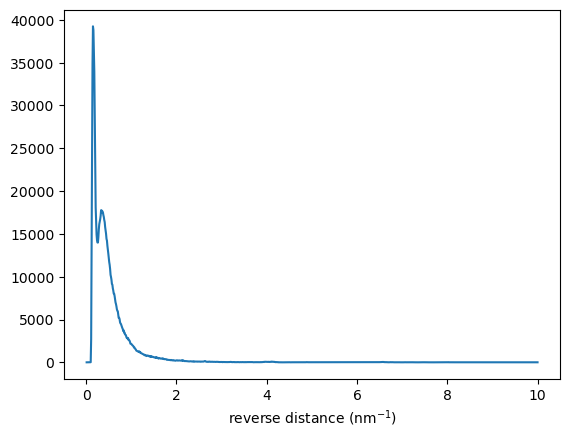

In [31]:
r_hist,r_dis_edge = np.histogram(rever_dis,range=[0,10],bins=1000)
plt.plot(r_dis_edge[1:],r_hist)
plt.xlabel('reverse distance '+r'(nm$^{-1}$)')

In [32]:
rever_dis_log = np.log10(1/distances)
print(rever_dis_log.min(),rever_dis_log.max())

-1.00508 1.0087812


Text(0.5, 0, 'log reverse distance')

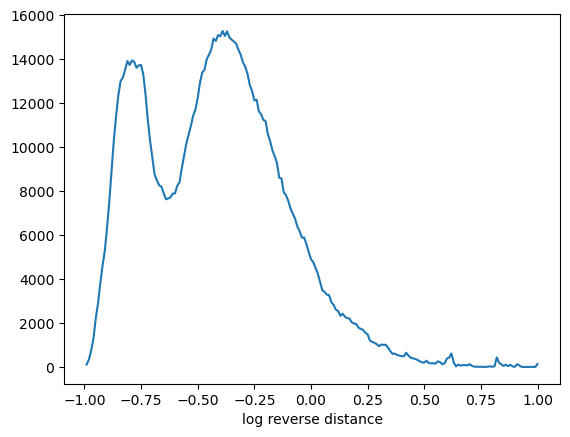

In [33]:
r_hist_lg,r_dis_edge_lg = np.histogram(rever_dis_log,range=[-1,1],bins=200)
plt.plot(r_dis_edge_lg[1:],r_hist_lg)
plt.xlabel('log reverse distance')